# Training Mnist dataset for practising purpose

##### Importing the dataset

In [7]:
from tensorflow.keras.datasets import mnist

##### Checking if the dataset is already downloaded and saved using pickle 

##### Importing pickle to store the train and test datasets 

In [8]:
import pickle

##### Method to download and store the dataset

In [11]:
def downloadDataset():
    
    global x_train
    global x_test
    global y_train
    global y_test
    
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    
    with open("x_train", "wb") as f:
        pickle.dump(x_train, f)

    with open("x_test", "wb") as f:
        pickle.dump(x_test, f)

    with open("y_train", "wb") as f:
        pickle.dump(y_train, f)

    with open("y_test", "wb") as f:
        pickle.dump(y_test, f)

##### Method to load the downloaded data

In [12]:
def loadDataset():
    
    global x_train
    global x_test
    global y_train
    global y_test
    
    with open("x_train", "rb") as f:
        
        x_train = pickle.load(f)
        
    with open("x_test", "rb") as f:
        
        x_test = pickle.load(f)    
    
    with open("y_train", "rb") as f:
        
        y_train = pickle.load(f)
    
    with open("y_test", "rb") as f:
        
        x_test = pickle.load(f)

##### Importing the dataset 

In [13]:
import os


if (os.path.exists('x_train')):
    
    print ("Dataset found. Loading the dataset into objects")
    loadDataset()
    
else:
    
    print ("Dataset not found. Downloading the dataset")
    downloadDataset()
    

Dataset found. Loading the dataset into objects


### Displaying sample Image from the dataset

In [27]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
rand_14 = np.random.randint(0, x_train.shape[0], 14)

In [29]:
sample_digits = x_train[rand_14]

sample_labels = y_train[rand_14]

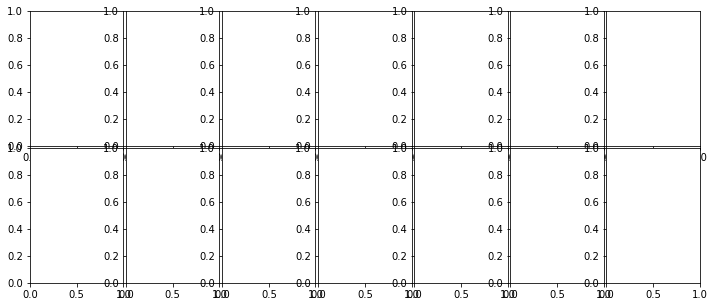

In [43]:
rows, cols = 2 , 7 
f, ax = plt.subplots(rows, cols, figsize=(12,5),
                     gridspec_kw={'wspace':0.03, 'hspace':0.01}, 
squeeze=True)

In [44]:
for r in range(rows):
    
    for c in range(cols):
        
        image_index = r * 7 + c
        
        ax[r,c].axis("off")
        ax[r,c].imshow(x_train[image_index], cmap="gray")
        ax[r,c].set_title('No. %d' % y_train[image_index])
        
plt.show()


In [45]:
plt.close()